In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
data  =pd.read_csv("500_Person_Gender_Height_Weight_Index.csv", error_bad_lines= False)
data.drop(["Index"], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
...,...,...,...
495,Female,150,153
496,Female,184,121
497,Female,141,136
498,Male,150,95


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = data.drop(["Gender"], axis = 1)
y = data.Gender.map({"Male":0,"Female":1})
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [6]:
X

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [8]:
y

0      0
1      0
2      1
3      1
4      0
      ..
495    1
496    1
497    1
498    0
499    0
Name: Gender, Length: 500, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [16]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [17]:
sc = StandardScaler().fit(X_train, y_train)

In [18]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [19]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [20]:
def predict(X, W, b):
    return (sigmoid(X.dot(W) + b))

In [21]:
b = 2.0
W = np.repeat(1.0, X_train.shape[1])
m = X_train.shape[0]

In [22]:
cost = list()

In [23]:
lr = 0.001
num_epochs = 100

In [24]:
for epoch in range(num_epochs):
    Y = predict(X_train, W, b)
    W = W - lr * X_train.T.dot(Y - y_train.T)
    b = b - lr * np.sum(Y - y_train.T)

    loss = -1/m * np.sum(y_train * np.log(Y) + (1 - y_train) * np.log(1 - Y))
    # print(W)
    # print(b)
    cost.append(loss)

In [25]:
print(f"params are W:{W} and b:{b}")

params are W:[ 0.05657914 -0.07187297] and b:8.421298512287035e-05


In [26]:
probs = predict(X_test, W, b)
preds = np.where(probs > .5, 1,0)

In [27]:
test_acc = accuracy_score(y_true = y_test, y_pred = preds)

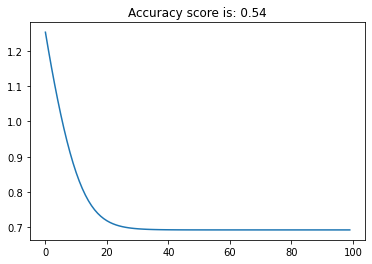

In [28]:
plt.plot(cost)
plt.title(f"Accuracy score is: {round(test_acc,3)}");